In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

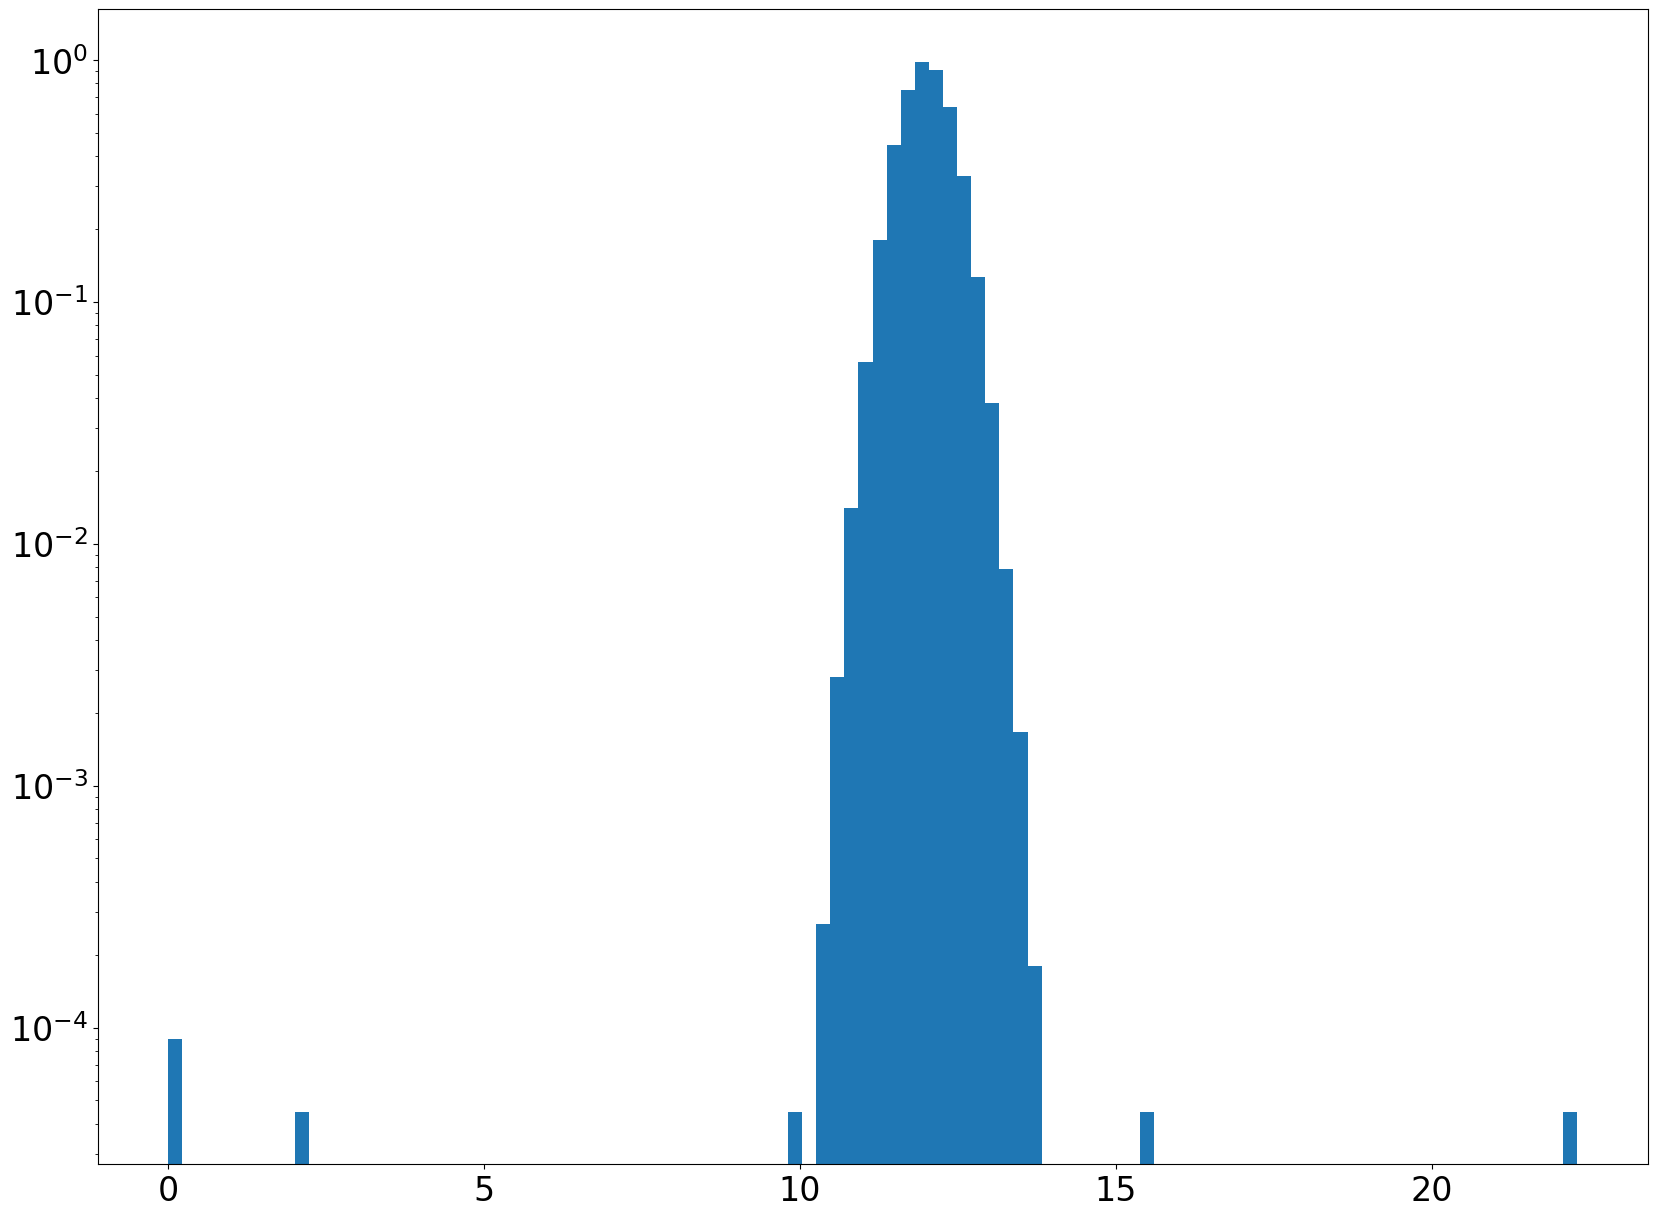

In [3]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

State the statistical question in words

Is my data consistent with 12 Kelvin within the 0.4 degree precision.


Does my data point lie within 4 sigma of the given temperature of 12K where the distribution of the temperature is gaussian with a standard deviation of .4?


No. of good data points: 1000

Number that lie within 4 sigma of the mean

In [4]:
p1 = stats.norm.cdf(4)

In [5]:
p2 = stats.norm.cdf(-4)

percent that lie within 4 sigma

In [6]:
p1 - p2

0.9999366575163338

Number that lie within 4 sigma of the mean

In [7]:
(p1 - p2) * 1000

999.9366575163338

number that lie beyond 4 sigma:

In [8]:
1000 - 999.9366575163338


0.06334248366624706

No. of bad data points :  (10, 10.3, 2.1, 0, 0, 15.6, 22.3, 12.7) :  8

sigma value of 10:

In [9]:
v = stats.norm.sf(10, loc = 12, scale = .4)

In [10]:
stats.norm.isf(v)

-4.999999999970176

sigma value of 10.3:

In [11]:
v = stats.norm.sf(10.3, loc = 12, scale = .4)
v

0.9999893114742251

In [12]:
stats.norm.isf(v)

-4.250000000000626

sigma value of 2.1:

In [13]:
v = stats.norm.sf(2.1, loc = 12, scale = .4)

In [14]:
stats.norm.isf(v)

-inf

sigma value of 0:

In [15]:
v = stats.norm.sf(0, loc = 12, scale = .4)

In [16]:
stats.norm.isf(v)

-inf

sigma value of 15.6:

sigma value of 22.3:

sigma value of 12.7:

## Problem 2:


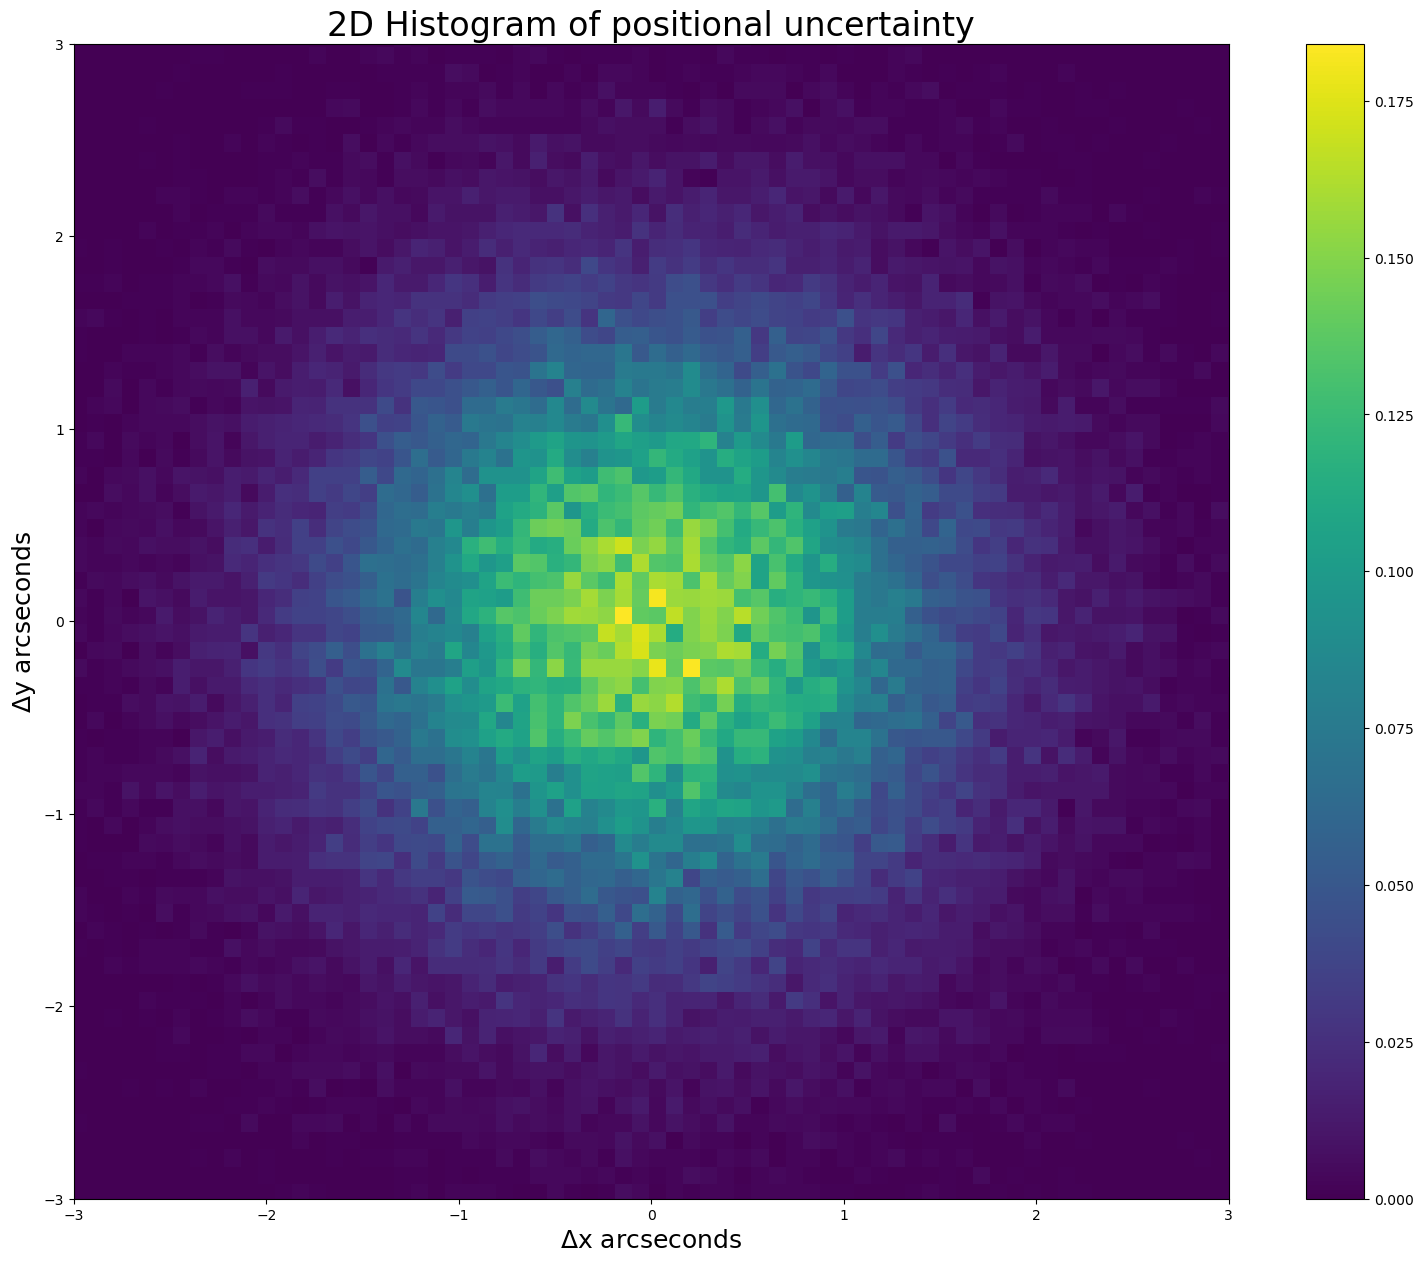

In [17]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

#### 1.What is the question in words?

For what radius is the movement of a star considered significant

#### 2. What is the question in math?

The radius of the movement is same as the amplitude of the position of the star Xi + Yj. We know that the pdf of amplitude of Gaussians of zero mean and sigma_squared variance is Rayleigh Distribution with shape parameter sigma.Thus we have to find the point on the rayleigh function that has a probability corresponding to a sigma value of 5.

#### 3. What distance in arcseconds represents a 5 sigma detection of motion?

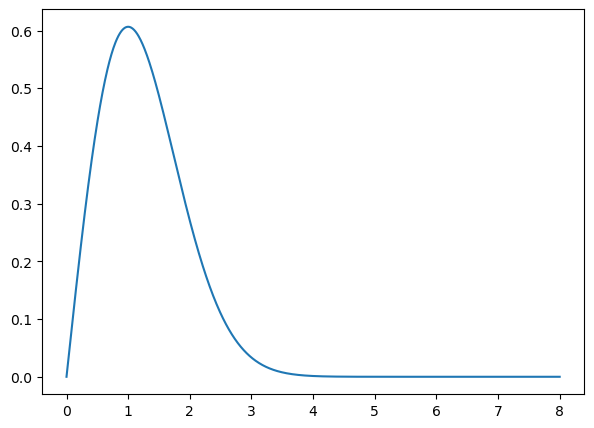

In [18]:
d = stats.rayleigh.pdf(np.linspace(0,8,1000))
plt.rcParams["figure.figsize"] = (7,5)
fig, ax = plt.subplots(1, 1)

ax.plot( np.linspace(0,8,1000),d)

In [19]:
 stats.norm.cdf(5)

0.9999997133484281

In [20]:
stats.rayleigh.ppf(0.9999997133484281)

5.489079776034238

## Problem 3

#### 1.What is the question in words?

What would be the probability that our background produces the given number of signals or less?

#### 2.Translate the question to math, describing both the expected background pdf() and the integral you need to do.

The Poisson random variable satisfies the following conditions:

1.The number of successes in two disjoint time intervals is independent.

2.The probability of a success during a small time interval is proportional to the entire length of the time interval.

Thus we can say that the pdf() of the number of signals produced by the background has a poisson distribution with the mean of 7200 signals.to get the probability of getting 6800 signals or less we sum all the values upto that point. 

#### 3.Convert to sigma.

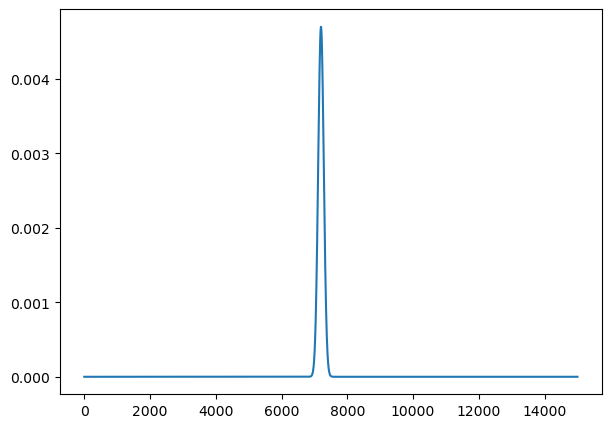

In [23]:
mu = 7200
x = np.arange(0, 15000)
plt.plot(x, stats.poisson.pmf(x, mu))
plt.show()

In [27]:
sum(stats.poisson.pmf(x, mu)[:6800])

9.548184551554207e-07

In [28]:
stats.norm.ppf(9.548184551554207e-07)

-4.762759176740926